# LSTM model

In [ ]:
import numpy as np
from tensorflow.keras import layers,regularizers,models
from tensorflow import keras
import matplotlib.pyplot as plt
import os

In [11]:
def build_lstm_model(input_shape=(32,1), num_class=8):
    
    
    model = models.Sequential([
        layers.BatchNormalization(input_shape=input_shape),
        layers.LSTM(256,dropout=0.2,recurrent_dropout=0.2,activation=None,return_sequences=True,kernel_regularizer=regularizers.l2(1e-7)),
        # layers.BatchNormalization(),
        layers.LSTM(128,dropout=0.2,recurrent_dropout=0.2,return_sequences=True,kernel_regularizer=regularizers.l2(1e-7)),
        # layers.BatchNormalization(),
        layers.LSTM(32,dropout=0.2,recurrent_dropout=0.2,return_sequences=True,activation=None,kernel_regularizer=regularizers.l2(2e-6)),
        layers.BatchNormalization(),
        # layers.LSTM(32,dropout=0.5,recurrent_dropout=0.2,return_sequences=True,activation=None),

        # layers.BatchNormalization(),
        layers.Flatten(),
        # layers.Dense(128,activation='relu',kernel_regularizer=regularizers.l2(1e-3)),
        # layers.Dropout(0.3),
        layers.Dense(256,activation='relu',kernel_regularizer=regularizers.l2(1e-5)),
        layers.Dropout(0.2),
        layers.BatchNormalization(),

        # layers.Dense(128,activation='relu',kernel_regularizer=regularizers.l2(1e-5)),
        # layers.Dropout(0.1),
        # layers.Dense(128,activation='relu',kernel_regularizer=regularizers.l2(1e-4)),
        # layers.Dropout(0.1),
        
        layers.Dense(num_class,activation='softmax'),
    ])
                            

    return model

In [12]:
def load_features(feature_path):
    x = []
    y = []
    for feature in os.listdir(feature_path):
        feat = np.loadtxt(feature_path+feature,delimiter=',')
        # print(feat.shape)
        x.append(feat)
        label = feature[-7]
        y.append(int(label))
    x = np.array(x)
    y = np.array(y)
    h,w = x.shape
    x = x.reshape(h,w,1)
    h = y.shape[0]
    y = y.reshape(h,1)
    return (x,y)

# Loading features

In [13]:
x_train,y_train = load_features('features/train/')
x_test,y_test = load_features('features/test/')
print((x_train.shape,y_test.shape))

((1152, 20, 1), (288, 1))


# Training the model
The model classifies human voices in 8 different classes of emotions

**label**   **emotion**

0   =   neutral

1   =   calm

2   =   happy

3   =   sad

4   =   angry

5   =   fearful

6   =   disgust

7   =   surprised

In [19]:
model=build_lstm_model(x_train[0].shape)
# model.summary()
model.compile(loss='sparse_categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
# csv_logger = CSVLogger('model_history.log', separator=',', append=False)
history=model.fit(x_train,y_train,epochs=200,batch_size=64,validation_data=(x_test,y_test))

 val_accuracy: 0.6458
Epoch 62/200
18/18 [==============================] - 2s 89ms/step - loss: 0.7064 - accuracy: 0.7578 - val_loss: 1.0714 - val_accuracy: 0.6458
Epoch 63/200
18/18 [==============================] - 2s 89ms/step - loss: 0.6826 - accuracy: 0.7691 - val_loss: 1.1319 - val_accuracy: 0.6250
Epoch 64/200
18/18 [==============================] - 2s 86ms/step - loss: 0.6805 - accuracy: 0.7613 - val_loss: 1.0973 - val_accuracy: 0.6354
Epoch 65/200
18/18 [==============================] - 2s 87ms/step - loss: 0.6756 - accuracy: 0.7613 - val_loss: 1.0591 - val_accuracy: 0.6389
Epoch 66/200
18/18 [==============================] - 2s 87ms/step - loss: 0.6452 - accuracy: 0.7743 - val_loss: 1.0302 - val_accuracy: 0.6389
Epoch 67/200
18/18 [==============================] - 2s 87ms/step - loss: 0.6569 - accuracy: 0.7595 - val_loss: 0.9937 - val_accuracy: 0.6562
Epoch 68/200
18/18 [==============================] - 2s 87ms/step - loss: 0.6029 - accuracy: 0.7760 - val_loss: 0.9502 

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_9 (Batch (None, 20, 1)             4         
_________________________________________________________________
lstm_9 (LSTM)                (None, 20, 256)           264192    
_________________________________________________________________
lstm_10 (LSTM)               (None, 20, 128)           197120    
_________________________________________________________________
lstm_11 (LSTM)               (None, 20, 32)            20608     
_________________________________________________________________
batch_normalization_10 (Batc (None, 20, 32)            128       
_________________________________________________________________
flatten_3 (Flatten)          (None, 640)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)              

## Plots

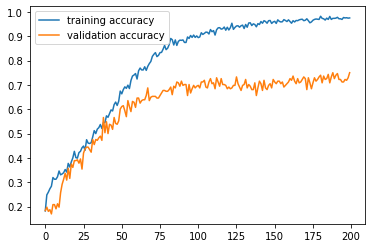

In [21]:
plt.plot(history.history['accuracy'],label = 'training accuracy')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
plt.legend()
plt.show()

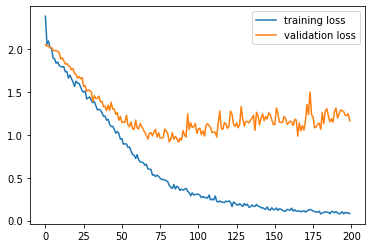

In [22]:
plt.plot(history.history['loss'],label = 'training loss')
plt.plot(history.history['val_loss'],label = 'validation loss')
plt.legend()
plt.show()

In [23]:
model.save('lstm_model_team-4')

INFO:tensorflow:Assets written to: lstm_model_team-4/assets
